# Random Number Generation
During the observations, I will use Python code to demonstrate the generation 
of pseudorandom variables using linear congruential generator formula 

## Introduction:

Before I start, I should explain a little why we do actually need randomness. Randomness is known for its **"unpredictability"** (I will talk about this more) and distributions. For instance, we can use randomness in encryption. We can send messages, that is not readable by anyone. But, here is a problem. How our message will be *read* by our recipient. The encryption *has to* be decrypted. So here comes **algorithms of randomness** or "laws". Using them we can predict the randomness.

A **random variable** is a mathematical formalization of a quantity or object which depends on *random events*
Assuming mentioned above, random variable is **not** random **nor** variable. It is an outcome of some function from algorithm 
by the *pseudo random variable generator*.

**Pseudo Random Number Generator(PRNG)** is a process that refers to an algorithm that uses mathematical formulas 
to produce sequences of random numbers. In our case, such formula will be presented as *linear congruential formula*.
 
A **linear congruential generator (LCG)** is an algorithm that yields a sequence of pseudo-randomized numbers calculated with a discontinuous piecewise linear equation. 
The method represents one of the oldest and best-known pseudorandom number generator algorithms.
The generator is defined by the recurrence relation: $$ X_{n+1} = (aX_n+c)\mod m $$
where $X$ is the sequence of pseudo-random values, and 
|Value and constraints|Describtion|
|---------------------|-----------|
|$$m, 0\lt m $$       |the modulus|
|$$a, 0\lt a \lt m$$  |the multiplier|
|$$c, 0\le c \lt m $$ |the increment|
|$$ X_0, 0\leq X_0 \lt m $$|the seed or start value|
The basic idea of the generator lies on its formula. In a nutshell, we multiply the initial value (seed) or the previous one obtained by the previous operation (suppose we have already deployed a formula), add the parameter c, and, with received result we take the modulo m. 


In [2]:
class LinearCongruentialGenerator:
    def __init__(self, seed, a, c, m):  #constructor takes 4 parameters and initialize fields 
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def next_random(self):
        self.state = (self.a * self.state + self.c) % self.m #provide a formula
        return self.state

# initialize parameters for using them in LCG (values are changeable and exactly these are taken from Wikipedia (see references))
seed_value = 42
a_value = 1103515245
c_value = 12345
m_value = 2**31

# instance of LCG class where we fetch all neccessary paramenters in according with constructor context
lcg = LinearCongruentialGenerator(seed_value, a_value, c_value, m_value)

#call a function next_random() on lcg objecgt and write to the list of range pointed in paranthesis of range() function
random_sequence = [lcg.next_random() for _ in range(5)]
#print the list of received numbers
print("Generated pseudorandom sequence:", random_sequence)

Generated pseudorandom sequence: [1250496027, 1116302264, 1000676753, 1668674806, 908095735]


## Analyses:

By starting the code above different times, we always get the same sequence of numbers. It does not even matter how many numbers we have in a sequence, 4 or 10 or 1 or 2312312412. It is absolutely understandable, because as I said there is no random variables, actually. All these depend on initial condition. In our case this condition is determined by seed = 42. Here one question is firing. By knowing the seed we can predict the number? Yes, but how? In our case we also need to know some additional parameters like modulus, increment and multiplier. 

Nevertheless, what if I say that in some sequence of number, numbers will repeat. YES! LCG has periodicity, and after a certain number of generated numbers they will start repeating themselves. 
Formula for obtaining a period: $$a^p \mod m \equiv 1$$
*P.s.* One moment, I suggest taking small numbers in parameters because the calculation of period is quietly labor-intensive process, and it can take a while or even Memory Error exception and crash. I little bit prevent you from Memory Error thrown from the code by limitation presenting a variable *max_iteration*. **Please do not make it bigger if it is possible.** 
If period limit the max_iteration, that means in this sequence all numbers are unique.

In [3]:
#RECCOMEND: DECREASE THE VALUES OF PARAMETERS BY WITHDRAWAL A COMMENT!
#seed_value = 1
#a_value = 2
#c_value = 3
#m_value = 5
def find_lcg_period(seed, a, c, m, max_iterations=100000):
    values_seen = set()
    current_value = seed
    period = 0

    for i in range(max_iterations):
        if current_value in values_seen:
            break
        else:
            values_seen.add(current_value)
            current_value = (a * current_value + c) % m
            period += 1

    return period
period = find_lcg_period(seed_value, a_value, c_value, m_value)
print(f"Period LCG: {period}")

Period LCG: 100000


For the provided code I can also make a calculation of some statistical variables: mean, variance and standard deviation values.

In [4]:
import statistics
mean = sum(random_sequence)/len(random_sequence)
std_dev = statistics.stdev(random_sequence)
variance = statistics.variance(random_sequence)
print(f"Mean: {mean}, Variance: {variance}, Standart Deviation: {std_dev}")

Mean: 1188849117.0, Variance: 8.838184482371571e+16, Standart Deviation: 297290842.1457272


Let's now check some interesting moment. What if we will change the value of modulo **m**. 
(Also I decrease significantly values of a, c and seed for better viewing)

In [5]:
seed_value = 1
a_value = 2
c_value = 3
m_value = 5

lcg = LinearCongruentialGenerator(seed_value, a_value, c_value, m_value)
#everyting works as in previous code, but here i do not store the value in separate variable. I fetch the calculation directly.
print("Generated pseudorandom sequence:", [lcg.next_random() for _ in range(20)])
print(f"Period LCG: {find_lcg_period(seed_value, a_value, c_value, m_value)}")

Generated pseudorandom sequence: [0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1]
Period LCG: 4


I can visualize the obtained result sequence in graph, for more explicit view of randomness.

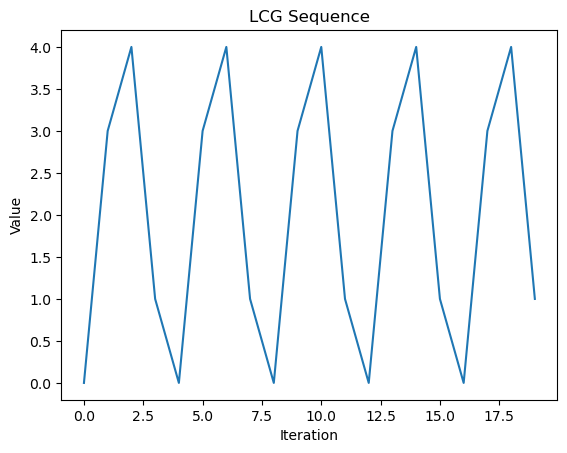

In [1]:
#Use this cell for self-analyze
import matplotlib.pyplot as plt
plt.plot([0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1])
plt.title('LCG Sequence')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()

In [6]:
m_value = 12
lcg = LinearCongruentialGenerator(seed_value, a_value, c_value, m_value)
print("Generated pseudorandom sequence:", [lcg.next_random() for _ in range(20)])
print(f"Period LCG: {find_lcg_period(seed_value, a_value, c_value, m_value)}")

Generated pseudorandom sequence: [5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]
Period LCG: 2


In [7]:
m_value = 17
lcg = LinearCongruentialGenerator(seed_value, a_value, c_value, m_value)
print("Generated pseudorandom sequence:", [lcg.next_random() for _ in range(20)])
print(f"Period LCG: {find_lcg_period(seed_value, a_value, c_value, m_value)}")

Generated pseudorandom sequence: [5, 13, 12, 10, 6, 15, 16, 1, 5, 13, 12, 10, 6, 15, 16, 1, 5, 13, 12, 10]
Period LCG: 8


In [8]:
m_value = 24
lcg = LinearCongruentialGenerator(seed_value, a_value, c_value, m_value)
print("Generated pseudorandom sequence:", [lcg.next_random() for _ in range(20)])
print(f"Period LCG: {find_lcg_period(seed_value, a_value, c_value, m_value)}")

Generated pseudorandom sequence: [5, 13, 5, 13, 5, 13, 5, 13, 5, 13, 5, 13, 5, 13, 5, 13, 5, 13, 5, 13]
Period LCG: 3


Period is obviously bigger when the modulo is prime number (can be divided only by 1 and itself)
Prime numbers provide the maximum "full period" for most parameter choices 
a, c, and m. If m is not simple, a more careful choice of parameters is needed to ensure the full period. When 
m is a prime number, the period is usually equal to m-1 that is the maximum possible value for the LCG period when selecting the 
m as a prime number.

Pros and cons of LCG:

Advantages:
- fast; 
- require minimal memory to retain state; 
- suitable for simulating multiple independent streams.

Disadvantages:
- sensitivity for parameters **m** and **a**;
- too easy to predict;
- not stable for randomness.

## Conclusion
During this report, I have learned how to build a document combined with peaces of code in Python and Markdown text in cells. I like this because it is very convenient in structure, easy to understand and time-consuming. I believe it helps anyone in building reports. Also, the good feature that Python is no only one, platform also support R programming language. Moreover, I have learned how to make a markup text using LaTeX formulas. I have basic knowledge in HTML, so it helps me to understand using symbols easier. Also, I am happy that learning Jupyter Notebook was provided by an equally interesting topic of Random Number Generator with example of Linear Congruential generator formula. It can be very useful for my future career plans and goals, and a good chance to perform my knowledge during the interview and win among other candidates). I find random algorithms useful in Game Development and Cybersecurity directions. Of course, this observation is not the end, and the progress upgrades. I will continue learning random algorithm further, improve code generators. LCG is not the best one, and there are some that should be discussed. As the main one, LCG is very very sensitive for its a and m parameters. For example a and c create a simple counter with modulo m that has a long period, but obviously it is not "random". My next step can lie on learning RANDU algorithm that seems interesting for me.

## References:
[Code in Python](https://www.geeksforgeeks.org/linear-congruence-method-for-generating-pseudo-random-numbers/)

[Random Variables](https://en.wikipedia.org/wiki/Random_variable#:~:text=The%20term%20'random%20variable'%20can,e.g.%2C%20in%20which%201%20is)
    
[Linear Congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)
    
[Pseudo Random Number Generator](https://www.linkedin.com/pulse/pseudo-random-number-generator-prng-rafi-mahmud/)

[How to Write Fomulas in Jupyter](https://jupyterbook.org/en/stable/content/math.html)